In [1]:
# default_exp algo.ml.tree.xgboost

# xgboost
https://xgboost.readthedocs.io/en/latest/python/index.html

https://github.com/dmlc/xgboost

https://xgboost.readthedocs.io/en/latest/index.html

## install
### mac
mac直接pip安装会报错
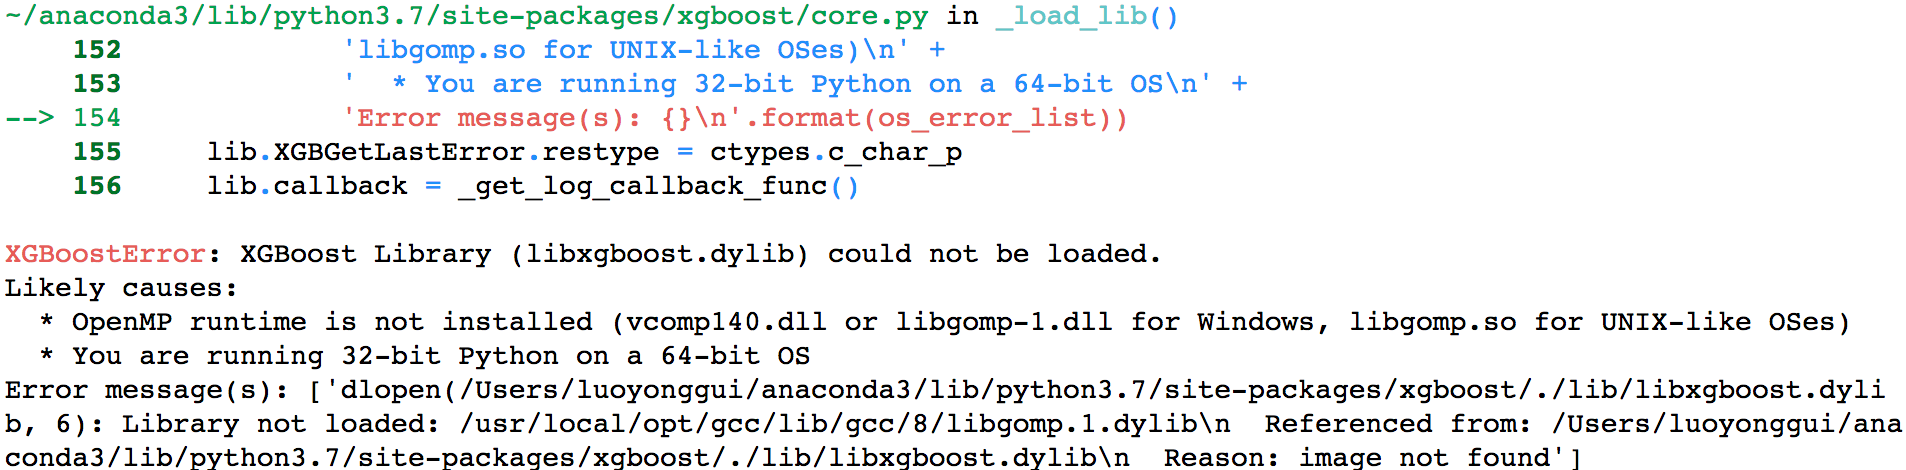

brew install gcc@8

pip3 install xgboost

In [1]:
!pip freeze | grep xgboost

xgboost==0.90


In [3]:
import xgboost as xgb

## xgboost的使用分为两类API：
* 原生api

* sklearn wrapper  

一般情况下，推荐使用sklearn的api;

但是貌似原生api的例子和资料会更多些，且更容易暴露xgboost的实现细节

# guide-python

## sklearn_examples.py
https://github.com/dmlc/xgboost/blob/master/demo/guide-python/sklearn_examples.py

In [1]:
import pickle
import xgboost as xgb

import numpy as np
from sklearn.model_selection import KFold, train_test_split, GridSearchCV
from sklearn.metrics import confusion_matrix, mean_squared_error
from sklearn.datasets import load_iris, load_digits, load_boston

rng = np.random.RandomState(31337)

print("Zeros and Ones from the Digits dataset: binary classification")

Zeros and Ones from the Digits dataset: binary classification


### 手写数字二分类

In [2]:
digits = load_digits(2, )

In [4]:
y = digits['target']
X = digits['data']

In [5]:
y

array([0, 1, 0, 1, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 1, 0, 0, 0, 1, 1, 1, 1,
       1, 0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 1, 0, 0, 0,
       1, 1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1,
       1, 0, 0, 0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 1,
       0, 0, 0, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 1,
       0, 0, 1, 1, 0, 0, 0, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 1,
       0, 1, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 0,
       1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 1, 0, 0, 0, 1, 1,
       1, 1, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 1,
       1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 1,
       0, 0, 0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 1, 0,
       0, 0, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 1, 0,
       0, 1, 1, 0, 0, 0, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 1, 0,
       1, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 1, 0, 0, 0,

In [6]:
X

array([[ 0.,  0.,  5., ...,  0.,  0.,  0.],
       [ 0.,  0.,  0., ..., 10.,  0.,  0.],
       [ 0.,  0.,  1., ...,  3.,  0.,  0.],
       ...,
       [ 0.,  0.,  5., ...,  8.,  1.,  0.],
       [ 0.,  0.,  6., ...,  4.,  0.,  0.],
       [ 0.,  0.,  6., ...,  6.,  0.,  0.]])

In [7]:
X.shape

(360, 64)

In [8]:
kf = KFold(n_splits=2, shuffle=True, random_state=rng)

In [12]:
for train_index, test_index in kf.split(X):
    xgb_model = xgb.XGBClassifier().fit(X[train_index], y[train_index])
    predictions = xgb_model.predict(X[test_index])
    actuals = y[test_index]
    tn, fp, fn, tp = confusion_matrix(actuals, predictions).ravel()
    print(tn, fp, fn, tp)

92 2 0 86
84 0 2 94


### Iris: multiclass classification

In [20]:
print("Iris: multiclass classification")
iris = load_iris()
y = iris['target']
X = iris['data']

Iris: multiclass classification


In [21]:
kf = KFold(n_splits=2, shuffle=True, random_state=rng)
for train_index, test_index in kf.split(X):
    xgb_model = xgb.XGBClassifier().fit(X[train_index], y[train_index])
    predictions = xgb_model.predict(X[test_index])
    actuals = y[test_index]
    print(confusion_matrix(actuals, predictions))

[[25  0  0]
 [ 0 22  1]
 [ 0  2 25]]
[[25  0  0]
 [ 0 23  4]
 [ 0  0 23]]


### Boston Housing: regression

In [22]:
print("Boston Housing: regression")
boston = load_boston()
y = boston['target']
X = boston['data']
kf = KFold(n_splits=2, shuffle=True, random_state=rng)
for train_index, test_index in kf.split(X):
    xgb_model = xgb.XGBRegressor(objective='reg:squarederror').fit(X[train_index], y[train_index])
    predictions = xgb_model.predict(X[test_index])
    actuals = y[test_index]
    print(mean_squared_error(actuals, predictions))


Boston Housing: regression
12.807135990726463
10.197181102555929


### Parameter optimization

In [25]:
print("Parameter optimization")
y = boston['target']
X = boston['data']
xgb_model = xgb.XGBRegressor(objective='reg:squarederror')
clf = GridSearchCV(xgb_model,
                   {'max_depth': [2,4,6],
                    'n_estimators': [50,100,200]}, verbose=1)
clf.fit(X,y)
print(clf.best_score_)
print(clf.best_params_)

Parameter optimization
Fitting 3 folds for each of 9 candidates, totalling 27 fits


/Users/luoyonggui/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_split.py:1978: FutureWarning: The default value of cv will change from 3 to 5 in version 0.22. Specify it explicitly to silence this warning.
  warnings.warn(CV_WARNING, FutureWarning)
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


0.6001029721598573
{'max_depth': 4, 'n_estimators': 100}


[Parallel(n_jobs=1)]: Done  27 out of  27 | elapsed:    1.1s finished
/Users/luoyonggui/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_search.py:814: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


### 使用最优参数

In [31]:
kf = KFold(n_splits=2, shuffle=True, random_state=rng)
for train_index, test_index in kf.split(X):
    predictions = clf.predict(X[test_index])
    actuals = y[test_index]
    print(mean_squared_error(actuals, predictions))

1.178558446503386
1.339594286682789


In [33]:
np.allclose(clf.predict(X), clf.predict(X))

True

### Early-stopping

In [35]:
X = digits['data']
y = digits['target']
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)
clf = xgb.XGBClassifier()
clf.fit(X_train, y_train, early_stopping_rounds=10, eval_metric="auc",
    eval_set=[(X_test, y_test)])

[0]	validation_0-auc:0.999497
Will train until validation_0-auc hasn't improved in 10 rounds.
[1]	validation_0-auc:0.999497
[2]	validation_0-auc:0.999497
[3]	validation_0-auc:0.999749
[4]	validation_0-auc:0.999749
[5]	validation_0-auc:0.999749
[6]	validation_0-auc:0.999749
[7]	validation_0-auc:0.999749
[8]	validation_0-auc:0.999749
[9]	validation_0-auc:0.999749
[10]	validation_0-auc:1
[11]	validation_0-auc:1
[12]	validation_0-auc:1
[13]	validation_0-auc:1
[14]	validation_0-auc:1
[15]	validation_0-auc:1
[16]	validation_0-auc:1
[17]	validation_0-auc:1
[18]	validation_0-auc:1
[19]	validation_0-auc:1
[20]	validation_0-auc:1
Stopping. Best iteration:
[10]	validation_0-auc:1



XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0,
              learning_rate=0.1, max_delta_step=0, max_depth=3,
              min_child_weight=1, missing=None, n_estimators=100, n_jobs=1,
              nthread=None, objective='binary:logistic', random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
              silent=None, subsample=1, verbosity=1)

## sklearn_evals_result.py
https://github.com/dmlc/xgboost/blob/master/demo/guide-python/sklearn_evals_result.py

This script demonstrate how to access the xgboost eval metrics by using sklearn

In [37]:
import xgboost as xgb
import numpy as np
from sklearn.datasets import make_hastie_10_2

X, y = make_hastie_10_2(n_samples=2000, random_state=42)

In [39]:
# Map labels from {-1, 1} to {0, 1}
labels, y = np.unique(y, return_inverse=True)

X_train, X_test = X[:1600], X[1600:]
y_train, y_test = y[:1600], y[1600:]

param_dist = {'objective':'binary:logistic', 'n_estimators':2}

clf = xgb.XGBModel(**param_dist)
# Or you can use: clf = xgb.XGBClassifier(**param_dist)

clf.fit(X_train, y_train,
        eval_set=[(X_train, y_train), (X_test, y_test)], 
        eval_metric='logloss',
        verbose=True)

[0]	validation_0-logloss:0.682264	validation_1-logloss:0.685582
[1]	validation_0-logloss:0.672907	validation_1-logloss:0.679176


XGBModel(base_score=0.5, booster='gbtree', colsample_bylevel=1,
         colsample_bynode=1, colsample_bytree=1, gamma=0,
         importance_type='gain', learning_rate=0.1, max_delta_step=0,
         max_depth=3, min_child_weight=1, missing=None, n_estimators=2,
         n_jobs=1, nthread=None, objective='binary:logistic', random_state=0,
         reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None, silent=None,
         subsample=1, verbosity=1)

In [40]:
# Load evals result by calling the evals_result() function
evals_result = clf.evals_result()

In [41]:
evals_result

{'validation_0': {'logloss': [0.682264, 0.672907]},
 'validation_1': {'logloss': [0.685582, 0.679176]}}

In [42]:
print('Access logloss metric directly from validation_0:')
print(evals_result['validation_0']['logloss'])

print('')
print('Access metrics through a loop:')
for e_name, e_mtrs in evals_result.items():
    print('- {}'.format(e_name))
    for e_mtr_name, e_mtr_vals in e_mtrs.items():
        print('   - {}'.format(e_mtr_name))
        print('      - {}'.format(e_mtr_vals))

Access logloss metric directly from validation_0:
[0.682264, 0.672907]

Access metrics through a loop:
- validation_0
   - logloss
      - [0.682264, 0.672907]
- validation_1
   - logloss
      - [0.685582, 0.679176]


In [43]:
print('')
print('Access complete dict:')
print(evals_result)


Access complete dict:
{'validation_0': {'logloss': [0.682264, 0.672907]}, 'validation_1': {'logloss': [0.685582, 0.679176]}}


# XGBRegressor

In [ ]:
xgboost.XGBRegressor(
    max_depth=3,
    learning_rate=0.1,
    n_estimators=100,
    verbosity=1,
    silent=None,
    objective='reg:linear',
    booster='gbtree',
    n_jobs=1,
    nthread=None,
    gamma=0,
    min_child_weight=1,
    max_delta_step=0,
    subsample=1,
    colsample_bytree=1,
    colsample_bylevel=1,
    colsample_bynode=1,
    reg_alpha=0,
    reg_lambda=1,
    scale_pos_weight=1,
    base_score=0.5,
    random_state=0,
    seed=None,
    missing=None,
    importance_type='gain',
    **kwargs,
)

## 超参数说明
https://xgboost.readthedocs.io/en/latest/python/python_api.html#module-xgboost.sklearn

对于XGBoost，有几个超参数可以调优，包括n_estimators、max_depth、learning_rate、min_child_weight、subsample、gamma、colsample_bytree和colsample_bylevel。

## fit

In [4]:
xgbr = xgboost.XGBRegressor()

In [ ]:
xgbr.fit(
    X,
    y,
    sample_weight=None,
    eval_set=None,
    eval_metric=None,
    early_stopping_rounds=None,
    verbose=True,
    xgb_model=None,
    sample_weight_eval_set=None,
    callbacks=None,
)

In [ ]:
X (array_like) – Feature matrix

y (array_like) – Labels

In [ ]:
xgbr.feature_importances_

# stock_price_predict

## DataETL

In [45]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from fastai.tabular import add_datepart
from sklearn.preprocessing import LabelEncoder
%matplotlib inline

In [18]:
df = pd.read_pickle('data/600115.pkl')
df.head()

,ts_code,open,high,low,close,pre_close,change,pct_chg,vol,amount
trade_date,,,,,,,,,,
2014-01-02,600115.SH,2.79,2.79,2.74,2.75,2.77,-0.02,-0.72,71086.05,19618.296
2014-01-03,600115.SH,2.74,2.75,2.68,2.70,2.75,-0.05,-1.82,99269.74,26843.520
2014-01-06,600115.SH,2.70,2.70,2.58,2.60,2.70,-0.10,-3.70,149697.16,39048.662
2014-01-07,600115.SH,2.59,2.66,2.58,2.61,2.60,0.01,0.38,75141.68,19638.304
2014-01-08,600115.SH,2.62,2.64,2.58,2.60,2.61,-0.01,-0.38,67810.19,17638.616


In [19]:
df['date'] = df.index
df.drop(columns=['change', 'amount', 'pct_chg', 'ts_code'], inplace=True)
df.rename(columns={'close': 'adj_close', 'pre_close': 'close', 'vol': 'volume'}, inplace=True)
# Remove columns which you can't use as features
df.drop(['open', 'high', 'low', 'close', 'volume'], axis=1, inplace=True)

In [20]:
df.head()

,adj_close,date
trade_date,,
2014-01-02,2.75,2014-01-02
2014-01-03,2.70,2014-01-03
2014-01-06,2.60,2014-01-06
2014-01-07,2.61,2014-01-07
2014-01-08,2.60,2014-01-08


/Users/luoyonggui/anaconda3/lib/python3.7/site-packages/pandas/plotting/_converter.py:129: FutureWarning: Using an implicitly registered datetime converter for a matplotlib plotting method. The converter was registered by pandas on import. Future versions of pandas will require you to explicitly register matplotlib converters.

To register the converters:
	>>> from pandas.plotting import register_matplotlib_converters
	>>> register_matplotlib_converters()
  warnings.warn(msg, FutureWarning)


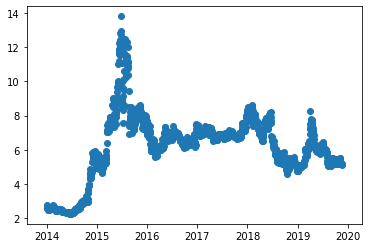

In [12]:
plt.scatter(x = df['date'],
            y = df['adj_close'],)

## 探索性数据分析（EDA）
EDA是机器学习项目的重要组成部分，它可以帮助我们获得对数据集的良好“感知”。正如我们将在下面看到的，EDA过程涉及到创建可视化来帮助大家更好地理解数据集。

In [21]:
#create features
add_datepart(df, 'date', drop=False)
df.drop('Elapsed', axis=1, inplace=True)  # don't need this
# Change all column headings to be lower case, and remove spacing
df.columns = [str(x).lower().replace(' ', '_') for x in df.columns]
# Convert year to categorical feature, based on alphabetical order
df.loc[:, 'year'] = LabelEncoder().fit_transform(df['year'])
df.head()

,adj_close,date,year,month,week,day,dayofweek,dayofyear,is_month_end,is_month_start,is_quarter_end,is_quarter_start,is_year_end,is_year_start
trade_date,,,,,,,,,,,,,,
2014-01-02,2.75,2014-01-02,0,1,1,2,3,2,False,False,False,False,False,False
2014-01-03,2.70,2014-01-03,0,1,1,3,4,3,False,False,False,False,False,False
2014-01-06,2.60,2014-01-06,0,1,2,6,0,6,False,False,False,False,False,False
2014-01-07,2.61,2014-01-07,0,1,2,7,1,7,False,False,False,False,False,False
2014-01-08,2.60,2014-01-08,0,1,2,8,2,8,False,False,False,False,False,False


### describe
略

### 时序方面的explore

#### month

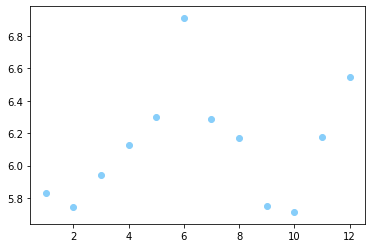

In [25]:
# Compute the average price for each month
avg_price_mth = df.groupby("month").agg({'adj_close': 'mean'}).reset_index()
plt.scatter(x = avg_price_mth['month'],
            y = avg_price_mth['adj_close'],c='LightSkyBlue')

#### day

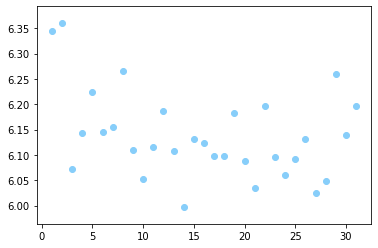

In [26]:
# Compute the average price for each day of month
avg_price_day = df.groupby("day").agg({'adj_close': 'mean'}).reset_index()
plt.scatter(x = avg_price_day['day'],
            y = avg_price_day['adj_close'],c='LightSkyBlue')

#### weekday

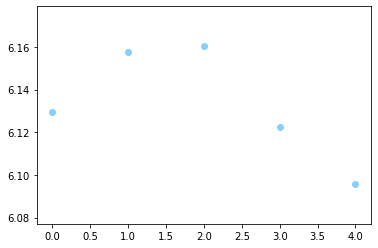

In [27]:
# Compute the average price for each day of week
avg_price_dayofweek = df.groupby("dayofweek").agg({'adj_close': 'mean'}).reset_index()
plt.scatter(
            x = avg_price_dayofweek['dayofweek'],
            y = avg_price_dayofweek['adj_close'],c='LightSkyBlue')

### 相关性方面的explore

In [28]:
def add_lags(df, N, lag_cols):
    """
    Add lags up to N number of days to use as features
    The lag columns are labelled as 'adj_close_lag_1', 'adj_close_lag_2', ... etc.
    """
    # Use lags up to N number of days to use as features
    df_w_lags = df.copy()
    df_w_lags.loc[:, 'order_day'] = [x for x in list(range(len(df)))] # Add a column 'order_day' to indicate the order of the rows by date
    merging_keys = ['order_day'] # merging_keys
    shift_range = [x+1 for x in range(N)]
    for shift in shift_range:
        train_shift = df_w_lags[merging_keys + lag_cols].copy()
    
        # E.g. order_day of 0 becomes 1, for shift = 1.
        # So when this is merged with order_day of 1 in df_w_lags, this will represent lag of 1.
        train_shift['order_day'] = train_shift['order_day'] + shift
    
        foo = lambda x: '{}_lag_{}'.format(x, shift) if x in lag_cols else x
        train_shift = train_shift.rename(columns=foo)

        df_w_lags = pd.merge(df_w_lags, train_shift, on=merging_keys, how='left') #.fillna(0)
    del train_shift
    
    return df_w_lags

In [30]:
N=10
# Create lags 
df_lags = add_lags(df, N, ['adj_close'])
df_lags.columns.tolist()

['adj_close',
 'date',
 'year',
 'month',
 'week',
 'day',
 'dayofweek',
 'dayofyear',
 'is_month_end',
 'is_month_start',
 'is_quarter_end',
 'is_quarter_start',
 'is_year_end',
 'is_year_start',
 'order_day',
 'adj_close_lag_1',
 'adj_close_lag_2',
 'adj_close_lag_3',
 'adj_close_lag_4',
 'adj_close_lag_5',
 'adj_close_lag_6',
 'adj_close_lag_7',
 'adj_close_lag_8',
 'adj_close_lag_9',
 'adj_close_lag_10']

In [32]:
corr_matrix = df_lags.corr()
corr_matrix["adj_close"].sort_values(ascending=False)

adj_close           1.000000
adj_close_lag_1     0.993351
adj_close_lag_2     0.986210
adj_close_lag_3     0.979832
adj_close_lag_4     0.972746
adj_close_lag_5     0.964962
adj_close_lag_6     0.957472
adj_close_lag_7     0.950701
adj_close_lag_8     0.945366
adj_close_lag_9     0.938966
adj_close_lag_10    0.931616
order_day           0.267331
year                0.267001
month               0.043597
week                0.042958
dayofyear           0.042020
is_month_start      0.017636
is_year_end         0.005111
is_month_end        0.004779
is_quarter_start    0.002213
is_quarter_end     -0.003039
dayofweek          -0.007587
day                -0.014799
is_year_start            NaN
Name: adj_close, dtype: float64

下面的热力图显示了经复权后的前几日收盘价与当日收盘价的相关性。很明显，经复权后的收盘价越接近当日，它们之间的相关性就越高。因此，在预测中应该使用与前10天复权收盘价相关的特征

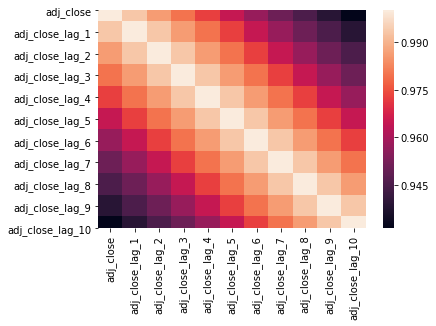

In [34]:
# Plot correlation for lag features only
features = ['adj_close']
for n in range(1,N+1,1):
    features.append("adj_close_lag_"+str(n))
        
corr_matrix = df_lags[features].corr()
sns.heatmap(corr_matrix)

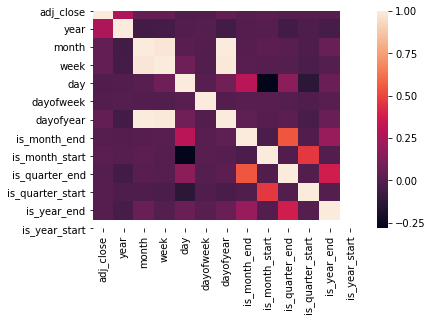

In [35]:
# Plot correlation for date features only
features = [
        'adj_close',
        'year',
        'month',
        'week',
        'day',
        'dayofweek',
        'dayofyear',
        'is_month_end',
        'is_month_start',
        'is_quarter_end',
        'is_quarter_start',
        'is_year_end',
        'is_year_start'
]
        
corr_matrix = df_lags[features].corr()
sns.heatmap(corr_matrix)

## FE 特征工程
略

## DataProcessor
要进行预测，我们需要训练和验证数据。

我们将使用3年的数据作为训练集，这相当于756天，因为一年中大约有252个交易日（252*3 = 756）。

我们将使用接下来1年的数据来执行验证，相当于252天。换句话说，对于做出的每个预测，我们需要756+252 = 1008天的数据来进行模型训练和验证。

模型将使用训练集进行训练，而模型超参数将使用验证集进行调优。要调优超参数，我们将使用移动窗口验证方法。


下面举例说明了训练规模为756天、验证规模为40天和预测周期为40天的情况。
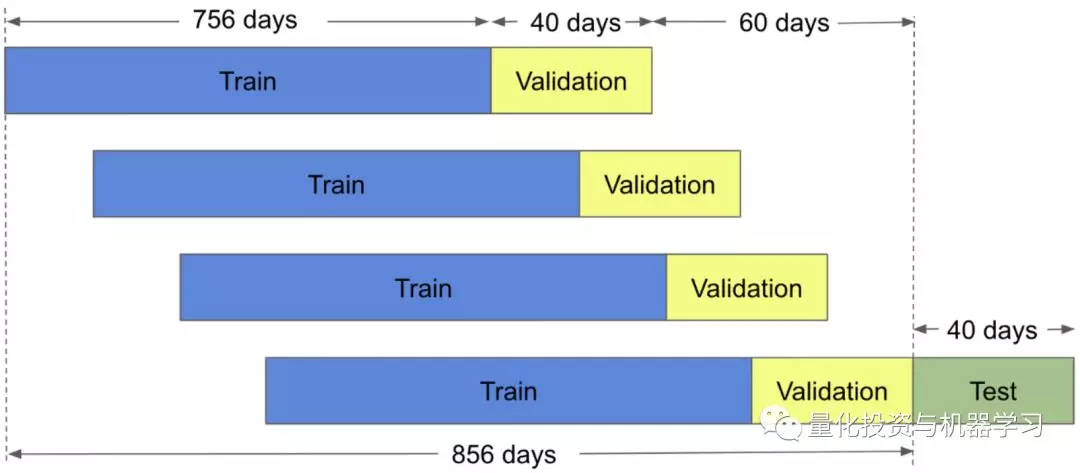

__在时间序列预测中，训练、验证、策略必须按时序进行，这一点非常重要！如果不按照此流程去做，将导致模型中的“信息泄漏”__。




In [38]:
pred_day = 1008                # Predict for this day, for the next H-1 days. Note indexing of days start from 0.

H = 21                         # Forecast horizon, in days. Note there are about 252 trading days in a year
train_size = 252*3             # Use 3 years of data as train set. Note there are about 252 trading days in a year
val_size = 252                 # Use 1 year of data as validation set
train_val_size = train_size + val_size # Size of train+validation set
print("No. of days in train+validation set = " + str(train_val_size))

No. of days in train+validation set = 1008


In [37]:
print("Predicting on day %d, date %s, with forecast horizon H = %d" % (pred_day, df.iloc[pred_day]['date'], H))

Predicting on day 1008, date 2018-03-13 00:00:00, with forecast horizon H = 21


In [39]:
train = df[pred_day-train_val_size:pred_day-val_size].copy()
val = df[pred_day-val_size:pred_day].copy()
train_val = df[pred_day-train_val_size:pred_day].copy()
test = df[pred_day:pred_day+H].copy()
print("train.shape = " + str(train.shape))
print("val.shape = " + str(val.shape))
print("train_val.shape = " + str(train_val.shape))
print("test.shape = " + str(test.shape))

train.shape = (756, 14)
val.shape = (252, 14)
train_val.shape = (1008, 14)
test.shape = (21, 14)


In [40]:
df.columns

Index(['adj_close', 'date', 'year', 'month', 'week', 'day', 'dayofweek',
       'dayofyear', 'is_month_end', 'is_month_start', 'is_quarter_end',
       'is_quarter_start', 'is_year_end', 'is_year_start'],
      dtype='object')

In [41]:
# Add lags up to N number of days to use as features
df = add_lags(df, N, ['adj_close'])
df.columns

Index(['adj_close', 'date', 'year', 'month', 'week', 'day', 'dayofweek',
       'dayofyear', 'is_month_end', 'is_month_start', 'is_quarter_end',
       'is_quarter_start', 'is_year_end', 'is_year_start', 'order_day',
       'adj_close_lag_1', 'adj_close_lag_2', 'adj_close_lag_3',
       'adj_close_lag_4', 'adj_close_lag_5', 'adj_close_lag_6',
       'adj_close_lag_7', 'adj_close_lag_8', 'adj_close_lag_9',
       'adj_close_lag_10'],
      dtype='object')

In [43]:
def get_mov_avg_std(df, col, N):
    """
    Given a dataframe, get mean and std dev at timestep t using values from t-1, t-2, ..., t-N.
    Inputs
        df         : dataframe. Can be of any length.
        col        : name of the column you want to calculate mean and std dev
        N          : get mean and std dev at timestep t using values from t-1, t-2, ..., t-N
    Outputs
        df_out     : same as df but with additional column containing mean and std dev
    """
    mean_list = df[col].rolling(window = N, min_periods=1).mean() # len(mean_list) = len(df)
    std_list = df[col].rolling(window = N, min_periods=1).std()   # first value will be NaN, because normalized by N-1
    
    # Add one timestep to the predictions
    mean_list = np.concatenate((np.array([np.nan]), np.array(mean_list[:-1])))
    std_list = np.concatenate((np.array([np.nan]), np.array(std_list[:-1])))
    
    # Append mean_list to df
    df_out = df.copy()
    df_out[col + '_mean'] = mean_list
    df_out[col + '_std'] = std_list
    
    return df_out

In [46]:
# Get mean and std dev at timestamp t using values from t-1, ..., t-N
df = get_mov_avg_std(df, 'adj_close', N)
df.columns

Index(['adj_close', 'date', 'year', 'month', 'week', 'day', 'dayofweek',
       'dayofyear', 'is_month_end', 'is_month_start', 'is_quarter_end',
       'is_quarter_start', 'is_year_end', 'is_year_start', 'order_day',
       'adj_close_lag_1', 'adj_close_lag_2', 'adj_close_lag_3',
       'adj_close_lag_4', 'adj_close_lag_5', 'adj_close_lag_6',
       'adj_close_lag_7', 'adj_close_lag_8', 'adj_close_lag_9',
       'adj_close_lag_10', 'adj_close_mean', 'adj_close_std'],
      dtype='object')

In [47]:
def do_scaling(df, N):
    """
    Do scaling for the adj_close and lag cols
    """
    df.loc[:, 'adj_close_scaled'] = (df['adj_close'] - df['adj_close_mean']) / df['adj_close_std']
    for n in range(N,0,-1):
        df.loc[:, 'adj_close_scaled_lag_'+str(n)] = \
            (df['adj_close_lag_'+str(n)] - df['adj_close_mean']) / df['adj_close_std']
        
        # Remove adj_close_lag column which we don't need anymore
        df.drop(['adj_close_lag_'+str(n)], axis=1, inplace=True)

    return df

In [48]:
# Do scaling
df = do_scaling(df, N)
df.columns

Index(['adj_close', 'date', 'year', 'month', 'week', 'day', 'dayofweek',
       'dayofyear', 'is_month_end', 'is_month_start', 'is_quarter_end',
       'is_quarter_start', 'is_year_end', 'is_year_start', 'order_day',
       'adj_close_mean', 'adj_close_std', 'adj_close_scaled',
       'adj_close_scaled_lag_10', 'adj_close_scaled_lag_9',
       'adj_close_scaled_lag_8', 'adj_close_scaled_lag_7',
       'adj_close_scaled_lag_6', 'adj_close_scaled_lag_5',
       'adj_close_scaled_lag_4', 'adj_close_scaled_lag_3',
       'adj_close_scaled_lag_2', 'adj_close_scaled_lag_1'],
      dtype='object')

In [49]:
# Get list of features
features_ex_adj_close = [
    'year',
    'month',
    'week',
    'day',
    'dayofweek',
    'dayofyear',
    'is_month_end',
    'is_month_start',
    'is_quarter_end',
    'is_quarter_start',
    'is_year_end'
]
features = features_ex_adj_close # features contain all features, including adj_close_lags
for n in range(N,0,-1):
    features.append("adj_close_scaled_lag_"+str(n))
features

['year',
 'month',
 'week',
 'day',
 'dayofweek',
 'dayofyear',
 'is_month_end',
 'is_month_start',
 'is_quarter_end',
 'is_quarter_start',
 'is_year_end',
 'adj_close_scaled_lag_10',
 'adj_close_scaled_lag_9',
 'adj_close_scaled_lag_8',
 'adj_close_scaled_lag_7',
 'adj_close_scaled_lag_6',
 'adj_close_scaled_lag_5',
 'adj_close_scaled_lag_4',
 'adj_close_scaled_lag_3',
 'adj_close_scaled_lag_2',
 'adj_close_scaled_lag_1']

In [ ]:
for i in range(train_size, len(df)-H+1, int(H/2)):  # H=21  [train_size, train_size+10, ...]
    # Split into train and test
    train = df[i-train_size:i].copy()
    test = df[i:i+H].copy()

    # Drop the NaNs in train
    train.dropna(axis=0, how='any', inplace=True)

    # Split into X and y
    X_train_scaled = train[features]
    y_train_scaled = train['adj_close_scaled']
    X_test_ex_adj_close = test[features_ex_adj_close]
    y_test = test['adj_close']
    prev_vals = train[-N:]['adj_close'].to_numpy()
    prev_mean_val = test.iloc[0]['adj_close_mean']
    prev_std_val = test.iloc[0]['adj_close_std']

    rmse, mape, mae, est, _ = train_pred_eval_model(X_train_scaled,
                                                    y_train_scaled,
                                                    X_test_ex_adj_close,
                                                    y_test,
                                                    N,
                                                    H,
                                                    prev_vals,
                                                    prev_mean_val,
                                                    prev_std_val,
                                                    seed=seed,
                                                    n_estimators=n_estimators,
                                                    max_depth=max_depth,
                                                    learning_rate=learning_rate,
                                                    min_child_weight=min_child_weight,
                                                    subsample=subsample,
                                                    colsample_bytree=colsample_bytree,
                                                    colsample_bylevel=colsample_bylevel,
                                                    gamma=gamma)
#         print("N = " + str(N) + ", i = " + str(i) + ", rmse = " + str(rmse) + ", mape = " + str(mape) + ", mae = " + str(mae))

    rmse_list.append(rmse)
    mape_list.append(mape)
    mae_list.append(mae)
    preds_dict[i] = est

# nb_export

In [14]:
from nbdev.export import *
notebook2script('algo_ml_tree_catboost.ipynb')

Converted algo_ml_tree_catboost.ipynb.
